# Analiza podatkov s pandas

[Pandas quick-start guide](http://pandas.pydata.org/pandas-docs/stable/10min.html)  
[Pandas documentation](http://pandas.pydata.org/pandas-docs/stable/)  
[Lecture notes on pandas](../predavanja/Analiza podatkov s knjižnico Pandas.ipynb)


### Naložimo pandas in podatke

In [1]:
# naložimo paket
import pandas as pd 

# ker bomo delali z velikimi razpredelnicami, povemo, da naj se vedno izpiše le 10 vrstic
pd.options.display.max_rows = 10

# izberemo interaktivni "notebook" stil risanja
# lepo za delat je tudi plotly
# % pomeni, da pokliče poseben komando in dela samo v jo
%matplotlib inline

#damo inline, da nariše slikce po vrsti. če damo notebook potem bo vse na enem grafu, ki se bo posodabljal.


# naložimo razpredelnico, s katero bomo delali
import os.path

filmi = pd.read_csv("knjige.csv")

Poglejmo si podatke.

In [53]:
filmi

,id,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis
0,4972,The Birth of a Nation,195,1915,6.4,NaN,20737,10000000.0,NaN,The Stoneman family finds its friendship with ...
1,6864,Intolerance: Love's Struggle Throughout the Ages,163,1916,7.8,92.0,13031,2180000.0,NaN,"The story of a poor young woman, separated by ..."
2,9968,Broken Blossoms or The Yellow Man and the Girl,90,1919,7.4,NaN,8700,NaN,NaN,"A frail waif, abused by her brutal boxer fathe..."
3,10323,Das Cabinet des Dr. Caligari,76,1920,8.1,NaN,50866,NaN,NaN,"Hypnotist Dr. Caligari uses a somnambulist, Ce..."
4,12349,The Kid,68,1921,8.3,NaN,100210,5450000.0,NaN,"The Tramp cares for an abandoned child, but ev..."
...,...,...,...,...,...,...,...,...,...,...
9995,9398640,Between Two Ferns: The Movie,82,2019,6.2,58.0,7319,NaN,NaN,Zach Galifianakis and his oddball crew take a ...
9996,9419834,Secret Obsession,97,2019,4.3,NaN,13308,NaN,NaN,"Recuperating from trauma, Jennifer remains in ..."
9997,9495224,Black Mirror: Bandersnatch,90,2018,7.2,NaN,96998,NaN,NaN,"In 1984, a young programmer begins to question..."
9998,9860728,Falling Inn Love,98,2019,5.6,NaN,7389,NaN,NaN,When city girl Gabriela spontaneously enters a...


## Proučevanje podatkov

Razvrstite podatke po ocenah.

In [23]:
filmi.sort_values(["ocena", "leto"], ascending=False)

,id,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis
9902,7286456,Joker,122,2019,9.5,70.0,14789,NaN,R,An original standalone origin story of the ico...
4196,252487,Hababam Sinifi,87,1975,9.4,NaN,34256,NaN,NaN,"Lazy, uneducated students share a very close b..."
9946,7738784,Peranbu,147,2018,9.3,NaN,10415,NaN,NaN,"A single father tries to raise his daughter, w..."
8284,2170667,Wheels,115,2014,9.3,NaN,17371,NaN,R,Two suicidal paraplegic junkies hustle their w...
2830,111161,Kaznilnica odrešitve,142,1994,9.3,80.0,2136999,28341469.0,R,Two imprisoned men bond over a number of years...
...,...,...,...,...,...,...,...,...,...,...
9718,5988370,Reis,108,2017,1.5,NaN,71969,NaN,NaN,A drama about the early life of Recep Tayyip E...
9726,6038600,Smolensk,120,2016,1.4,NaN,7417,NaN,NaN,Inspired by true events of 2010 Polish Air For...
9354,4458206,Kod Adi K.O.Z.,114,2015,1.4,NaN,26817,NaN,NaN,A look at the 17-25 December 2013 corruption s...
9237,4009460,Saving Christmas,79,2014,1.4,18.0,14365,2783970.0,PG,His annual Christmas party faltering thanks to...


Poberite stolpec ocen.

In [30]:
filmi[["ocena", 'glasovi', 'oznaka']]
ocene = filmi['ocena'] #delamo vektorsko z njimi, torej opreacije po kompotnentah. 
ocene

0       6.4
1       7.8
2       7.4
3       8.1
4       8.3
       ... 
9995    6.2
9996    4.3
9997    7.2
9998    5.6
9999    8.3
Name: ocena, Length: 10000, dtype: float64

Ukaza `filmi['ocena']` in `filmi[['ocena']]` sta različna:

In [26]:
print(type(filmi['ocena'])) #tretira kot vrsto
print(type(filmi[['ocena']])) #če damo notr seznam stvari še vedno tretira kot del tabele. 

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


Stolpci objekta `DataFrame` so tipa `Series`. Z enojnimi oklepaji poberemo `Series`, z dvojnimi oklepaji pa `DataFrame` podtabelo. Večina operacij (grouping, joining, plotting,  filtering, ...) deluje na `DataFrame`. 

Tip `Series` se uporablja ko želimo npr. dodati stolpec.

Zaokrožite stolpec ocen z funkcijo `round()`.

In [34]:
zaokrozene = round(ocene) *10  #dela po komponentah, ne pa 10*tabela od ocen 
zaokrozene


0       60.0
1       80.0
2       70.0
3       80.0
4       80.0
        ... 
9995    60.0
9996    40.0
9997    70.0
9998    60.0
9999    80.0
Name: ocena, Length: 10000, dtype: float64

Dodajte zaokrožene vrednosti v podatke.

In [36]:
filmi["zaokrozene ocene"] = zaokrozene
filmi

,id,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis,zaokrozene ocene
0,4972,The Birth of a Nation,195,1915,6.4,NaN,20737,10000000.0,NaN,The Stoneman family finds its friendship with ...,60.0
1,6864,Intolerance: Love's Struggle Throughout the Ages,163,1916,7.8,92.0,13031,2180000.0,NaN,"The story of a poor young woman, separated by ...",80.0
2,9968,Broken Blossoms or The Yellow Man and the Girl,90,1919,7.4,NaN,8700,NaN,NaN,"A frail waif, abused by her brutal boxer fathe...",70.0
3,10323,Das Cabinet des Dr. Caligari,76,1920,8.1,NaN,50866,NaN,NaN,"Hypnotist Dr. Caligari uses a somnambulist, Ce...",80.0
4,12349,The Kid,68,1921,8.3,NaN,100210,5450000.0,NaN,"The Tramp cares for an abandoned child, but ev...",80.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,9398640,Between Two Ferns: The Movie,82,2019,6.2,58.0,7319,NaN,NaN,Zach Galifianakis and his oddball crew take a ...,60.0
9996,9419834,Secret Obsession,97,2019,4.3,NaN,13308,NaN,NaN,"Recuperating from trauma, Jennifer remains in ...",40.0
9997,9495224,Black Mirror: Bandersnatch,90,2018,7.2,NaN,96998,NaN,NaN,"In 1984, a young programmer begins to question...",70.0
9998,9860728,Falling Inn Love,98,2019,5.6,NaN,7389,NaN,NaN,When city girl Gabriela spontaneously enters a...,60.0


Odstranite novo dodani stolpec z metodo `.drop()` z podanim `columns = ` argumentom.

In [42]:
# filmi.drop(columns="zaokrozene ocene") #ne posodobi tabele
#filmi = filmi.drop(columns="zaokrozene ocene")
filmi

,id,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis
0,4972,The Birth of a Nation,195,1915,6.4,NaN,20737,10000000.0,NaN,The Stoneman family finds its friendship with ...
1,6864,Intolerance: Love's Struggle Throughout the Ages,163,1916,7.8,92.0,13031,2180000.0,NaN,"The story of a poor young woman, separated by ..."
2,9968,Broken Blossoms or The Yellow Man and the Girl,90,1919,7.4,NaN,8700,NaN,NaN,"A frail waif, abused by her brutal boxer fathe..."
3,10323,Das Cabinet des Dr. Caligari,76,1920,8.1,NaN,50866,NaN,NaN,"Hypnotist Dr. Caligari uses a somnambulist, Ce..."
4,12349,The Kid,68,1921,8.3,NaN,100210,5450000.0,NaN,"The Tramp cares for an abandoned child, but ev..."
...,...,...,...,...,...,...,...,...,...,...
9995,9398640,Between Two Ferns: The Movie,82,2019,6.2,58.0,7319,NaN,NaN,Zach Galifianakis and his oddball crew take a ...
9996,9419834,Secret Obsession,97,2019,4.3,NaN,13308,NaN,NaN,"Recuperating from trauma, Jennifer remains in ..."
9997,9495224,Black Mirror: Bandersnatch,90,2018,7.2,NaN,96998,NaN,NaN,"In 1984, a young programmer begins to question..."
9998,9860728,Falling Inn Love,98,2019,5.6,NaN,7389,NaN,NaN,When city girl Gabriela spontaneously enters a...


### Opomba: slice
Izbira podtabele ustvari t.i. "rezino" oz. "slice".
Slice ni kopija tabele, temveč zgolj sklic na izvorno tabelo,
in je zato ne moremo spreminjati.
Če želimo kopijo, uporabimo metodo `.copy()` na rezini, ki jo nato lahko spreminjamo.


Izberite podtabelo s stolpci `naslov`, `leto`, in `glasovi`, kateri nato dodate solpec z zaokroženimi ocenami.

In [54]:
#filmi_light = filmi[["naslov", "leto", "glasovi"]] #vrstni red naštevanja bo tudi v novonastali tabeli. 
##ta stvar se sklicuje na tabelo. naredili smo podtabelo, vpogled, slice from a DataBase

#filmi_light["zaokrozena ocena"] = zaokrozene

filmi_light = filmi[["naslov", "leto", "glasovi"]].copy() #damo copy, in s tem ustvarimo novo tabelo
filmi_light["zaokrozena ocena"] = zaokrozene
filmi_light

,naslov,leto,glasovi,zaokrozena ocena
0,The Birth of a Nation,1915,20737,60.0
1,Intolerance: Love's Struggle Throughout the Ages,1916,13031,80.0
2,Broken Blossoms or The Yellow Man and the Girl,1919,8700,70.0
3,Das Cabinet des Dr. Caligari,1920,50866,80.0
4,The Kid,1921,100210,80.0
...,...,...,...,...
9995,Between Two Ferns: The Movie,2019,7319,60.0
9996,Secret Obsession,2019,13308,40.0
9997,Black Mirror: Bandersnatch,2018,96998,70.0
9998,Falling Inn Love,2019,7389,60.0


### Filtracija

Ustvarite filter, ki izbere filme, ki so izšli pred 1930, in filter za filme po 2017.
Združite ju za izbor filmov, ki so izšli pred 1930 ali po 2017.

In [60]:
prej_mask=filmi["leto"] < 1930
potem_mask = filmi["leto"] > 2017
filmi[prej_mask | potem_mask].tail(50) #-head(n) .tail(n) je prvih in nato zadnjih n vrstic

,id,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis
9949,7772580,The Perfection,90,2018,6.1,60.0,23498,NaN,NaN,When troubled musical prodigy Charlotte (Allis...
9950,7784604,Hereditary,127,2018,7.3,87.0,171416,44069456.0,R,"After the family matriarch passes away, a grie..."
9951,7798634,Ready or Not,95,2019,7.2,64.0,13953,26744177.0,R,A bride's wedding night takes a sinister turn ...
9952,7832124,Müslüm,136,2018,8.0,NaN,9807,NaN,NaN,A biopic about turkish vocal artist Müslüm Gür...
9953,7838252,K.G.F: Chapter 1,156,2018,8.2,NaN,25993,NaN,NaN,"Set in the 1970s, it's the story of a fierce r..."
...,...,...,...,...,...,...,...,...,...,...
9995,9398640,Between Two Ferns: The Movie,82,2019,6.2,58.0,7319,NaN,NaN,Zach Galifianakis and his oddball crew take a ...
9996,9419834,Secret Obsession,97,2019,4.3,NaN,13308,NaN,NaN,"Recuperating from trauma, Jennifer remains in ..."
9997,9495224,Black Mirror: Bandersnatch,90,2018,7.2,NaN,96998,NaN,NaN,"In 1984, a young programmer begins to question..."
9998,9860728,Falling Inn Love,98,2019,5.6,NaN,7389,NaN,NaN,When city girl Gabriela spontaneously enters a...


Tukaj bo: želimo vzet od 200 do 250 zadnjih filmov po starosti.

In [61]:
filmi.sort_values("leto").head(250).tail(50)

,id,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis
205,37865,Leave Her to Heaven,110,1945,7.6,NaN,9834,NaN,NaN,A writer falls in love with a young socialite ...
203,37800,I Know Where I'm Going!,91,1945,7.5,NaN,7222,NaN,NaN,A young Englishwoman goes to the Hebrides to m...
206,37884,The Lost Weekend,101,1945,7.9,NaN,30993,9460000.0,NaN,The desperate life of a chronic alcoholic is f...
201,37638,Detour,68,1945,7.4,NaN,13081,16172.0,NaN,Chance events trap hitch-hiker Al Roberts in a...
200,37635,Dead of Night,103,1945,7.7,NaN,9767,NaN,NaN,Architect Walter Craig (Mervyn Johns) senses i...
...,...,...,...,...,...,...,...,...,...,...
262,40746,Vrv,80,1948,8.0,73.0,117180,NaN,NaN,Two men attempt to prove they committed the pe...
261,40725,The Red Shoes,134,1948,8.2,NaN,25209,10900000.0,NaN,A young ballet dancer is torn between the man ...
260,40724,Red River,133,1948,7.8,NaN,25867,NaN,NaN,"Dunson leads a cattle drive, the culmination o..."
259,40662,Oliver Twist,116,1948,7.8,NaN,10399,NaN,NaN,An orphan named Oliver Twist meets a pickpocke...


Definirajte funkcijo, ki preveri ali niz vsebuje kvečjemu dve besedi. Nato s pomočjo `.apply()` izberite vse filme z imeni krajšimi od dveh besed in oceno nad 8.

In [72]:
def je_kratek_naslov(naslov, max_besed=2):
    return len(naslov.split()) <= max_besed

dobra_ocena = filmi["ocena"]>8
kratki_naslovi = filmi["naslov"].apply(je_kratek_naslov)

#želimo dobro oceno in kratki naslovi
filmi[dobra_ocena & kratki_naslovi]

,id,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis
4,12349,The Kid,68,1921,8.3,NaN,100210,5450000.0,NaN,"The Tramp cares for an abandoned child, but ev..."
5,12364,Körkarlen,100,1921,8.1,NaN,9106,NaN,NaN,"On New Year's Eve, the driver of a ghostly car..."
12,15324,Sherlock Jr.,45,1924,8.2,NaN,34452,977375.0,NaN,"A film projectionist longs to be a detective, ..."
14,15864,Zlata mrzlica,95,1925,8.2,NaN,91091,5450000.0,NaN,A prospector goes to the Klondike in search of...
15,15881,Greed,140,1924,8.1,NaN,8374,161800.0,NaN,The sudden fortune won from a lottery fans suc...
...,...,...,...,...,...,...,...,...,...,...
9973,8239946,Tumbbad,104,2018,8.2,NaN,15677,NaN,NaN,A mythological story about a goddess who creat...
9976,8267604,Capharnaüm,126,2018,8.4,75.0,27308,1661096.0,R,While serving a five-year sentence for a viole...
9987,8637428,The Farewell,100,2019,8.1,89.0,6892,16877010.0,PG,A Chinese family discovers their grandmother h...
9994,9052870,Chhichhore,143,2019,8.6,NaN,6719,898575.0,NaN,Following a group of friends from university a...


### Histogrami

Združite filme po ocenah in jih preštejte.

In [73]:
po_ocenah = filmi.groupby("ocena").size()
po_ocenah

ocena
1.0    1
1.4    3
1.5    1
1.6    3
1.7    3
      ..
9.0    6
9.2    2
9.3    3
9.4    1
9.5    1
Length: 82, dtype: int64

Naredite stolpični diagram teh podatkov.

<IPython.core.display.Javascript object>


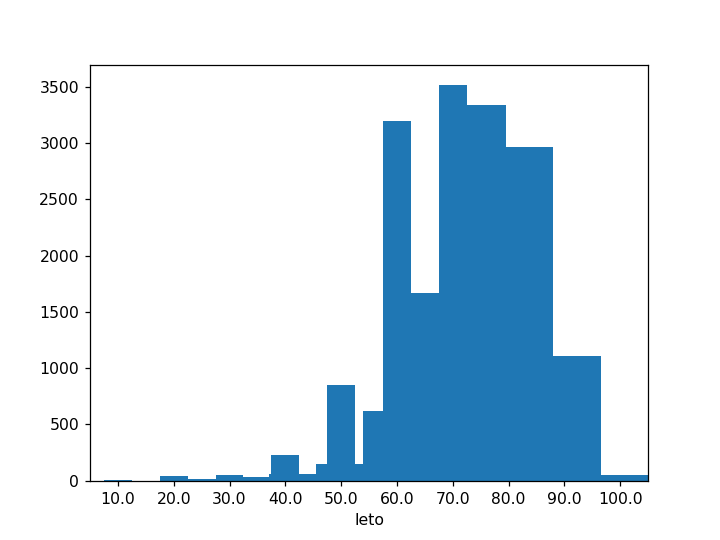

<AxesSubplot:xlabel='zaokrozena ocena'>

In [77]:
# po_ocenah.plot.bar() problem, ker je pregosto x os. lahko bi dali uproabili xticks
#poporavili bomo, da damo na zaokrožene ocene in jih dodamo v filmi
filmi["zaokrozena ocena"] = zaokrozene
po_ocenah = filmi.groupby("zaokrozena ocena").size()
po_ocenah.plot.bar()

Tabele imajo metodo `.hist()`, ki omogoča izgradnjo histogramov za stolpce. Uporabite to metodo za prikaz poenostavljenih podatkov.

In [78]:
filmi["ocena"].hist() #se zgorej spremeni graf

<AxesSubplot:xlabel='zaokrozena ocena'>

### Izris povprečne dolžine filma glede na leto

<AxesSubplot:xlabel='leto'>

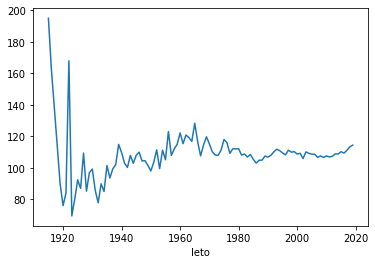

In [86]:
filmi_po_letu = filmi.groupby("leto")
povprecja_po_letu = filmi_po_letu.mean()
povprecna_dolzina = povprecja_po_letu["dolzina"]
povprecna_dolzina.plot()

### Izris skupnega zasluzka za posamezno leto

<AxesSubplot:xlabel='leto'>

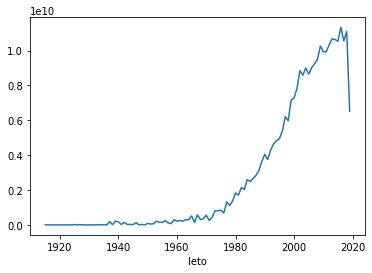

In [87]:
filmi_po_letu.sum()["zasluzek"].plot()

<AxesSubplot:xlabel='leto'>

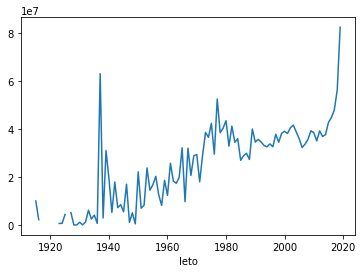

In [88]:
filmi_po_letu.mean()["zasluzek"].plot()